In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import cv2
import matplotlib.pyplot as plt

In [2]:
data = np.load('D:/opencv_101/OCR/Sudoku_Solver-main/digit_recognizer/mnist.npz')
trainData = data['x_train']
trainLabels = data['y_train']
testData = data[ 'x_test']
testLabels = data['y_test']

In [3]:
trainData.shape

(60000, 28, 28)

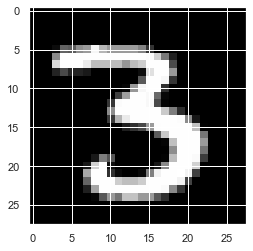

In [4]:
plt.imshow(trainData[12],cmap = 'gray')

In [5]:
trainData = trainData.reshape(trainData.shape[0],-1)
trainData.shape

(60000, 784)

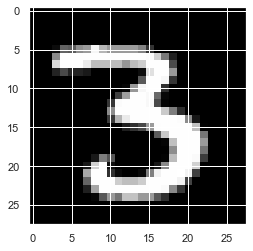

In [6]:
plt.imshow(trainData[12].reshape(28,-1),cmap = 'gray')

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(trainData)

In [8]:
cov_matrix = np.cov(trainData, rowvar = False)
# cov_matrix = np.dot(train.T,train)/train.shape[0]
cov_matrix.shape

(784, 784)

In [9]:
from numpy.linalg import eigh,svd
# eigen_val are in increasing order
# Larger value contributes more explained varience(retains most data)
eigen_val, eigen_vec = eigh(cov_matrix)
print(eigen_val.shape)
print(eigen_vec.shape)

(784,)
(784, 784)


In [10]:
n_comp = 2
eigen_v = eigen_vec[:,-2:]
eigen_v.shape

(784, 2)

In [11]:
reduced = np.dot(train,eigen_v)
reduced.shape

(60000, 2)

In [12]:
train_new = np.hstack([reduced,trainLabels.reshape(-1,1)])
df = pd.DataFrame(train_new, columns = ['PCA1','PCA2','Label'])
df.head()

,PCA1,PCA2,Label
0,-3.151684,-0.757836,5.0
1,-2.882909,-10.138951,0.0
2,4.517253,0.158245,4.0
3,-5.559200,7.978397,1.0
4,7.400429,4.096448,9.0


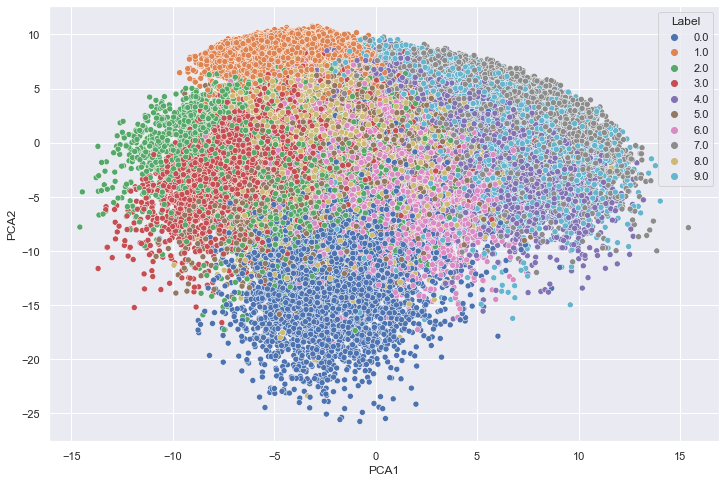

In [13]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data = df, x = 'PCA1', y = 'PCA2',hue = 'Label', palette="deep")

In [14]:
eigen_val = np.flip(eigen_val)
cum_var = eigen_val.cumsum()/eigen_val.sum()

In [15]:
# 1 featire retained 9% varience
# 2 features retained 17% varience
cum_var[:2]

array([0.09704664, 0.16800588])

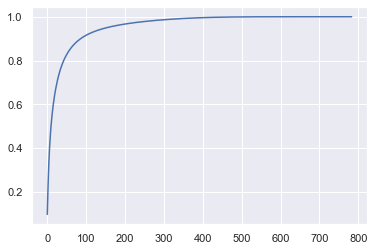

In [16]:
# 100 features retains 90% explained varience
plt.plot(cum_var)

In [17]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)

In [18]:
pca_data = pca.fit_transform(train)
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (60000, 2)


In [19]:
train_new = np.hstack([pca_data,trainLabels.reshape(-1,1)])
df = pd.DataFrame(train_new, columns = ['PCA1','PCA2','Label'])
df.head()

,PCA1,PCA2,Label
0,-0.922117,-4.817650,5.0
1,8.709005,-7.753847,0.0
2,2.328362,9.434509,4.0
3,-6.582176,-3.745139,1.0
4,-5.183270,3.133670,9.0


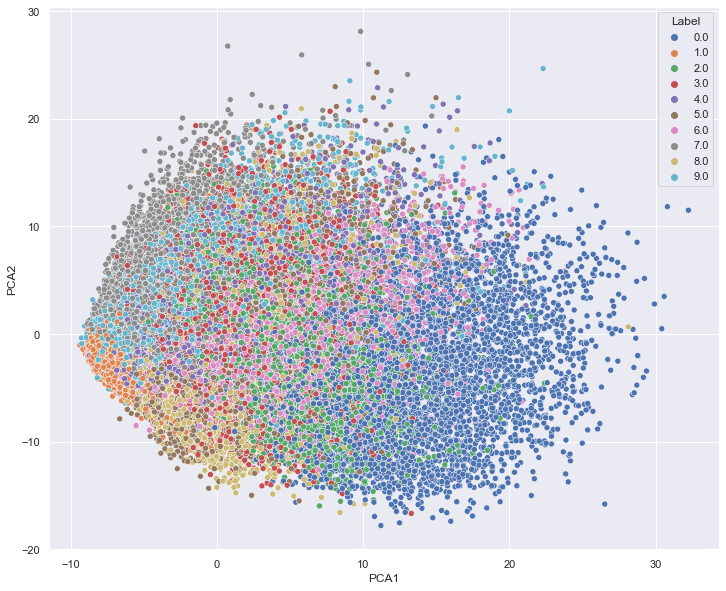

In [20]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 10)

sns.scatterplot(data = df, x = 'PCA1', y = 'PCA2',hue = 'Label', palette="deep")

In [21]:
# 1 featire retained 5% varience
# 2 features retained 9% varience
np.cumsum(pca.explained_variance_ratio_)

array([0.05646717, 0.09724989])

In [22]:
# n_components = n_features
pca = decomposition.PCA()
pca_data = pca.fit_transform(train)

In [23]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

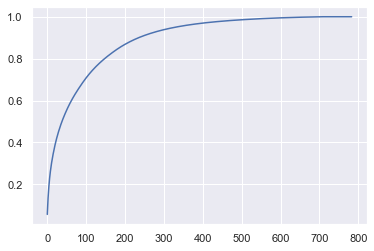

In [24]:
plt.plot(cum_var)

# Limitation of PCA

In [116]:
import random
x = []
y = []
for i in range(20):
    x.append([random.randint(100, 200),random.randint(100, 200)])
    y.append(1)
    x.append([random.randint(-200, -100),random.randint(-200, -100)])
    y.append(2)
    x.append([random.randint(100, 200),random.randint(-200, -100)])
    y.append(3)
    x.append([random.randint(-200, -100),random.randint(100, 200)])
    y.append(4)
x = np.array(x)
y = np.array(y)

In [117]:
data = np.hstack([x,y.reshape(-1,1)])
df = pd.DataFrame(data,columns = ['f1','f2','label'])
df.head()

,f1,f2,label
0,178,165,1
1,-162,-156,2
2,104,-190,3
3,-193,200,4
4,105,125,1


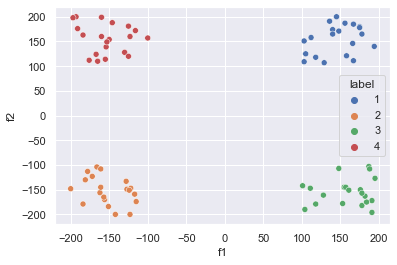

In [118]:
sns.scatterplot(data = df,x = 'f1', y = 'f2',hue = 'label',palette = 'deep')

In [119]:
x_scale = scaler.fit_transform(x)

In [120]:
# Reduce to 1 dimension
pca = decomposition.PCA(n_components = 1)
pca_data = pca.fit_transform(x_scale)
pca_data.shape

(80, 1)

In [122]:
# 1 feature retained 51% varience
pca.explained_variance_ratio_

array([0.51496333])

In [123]:
data = np.hstack([pca_data,y.reshape(-1,1)])
df1 = pd.DataFrame(data,columns = ['f1','label'])
df1.head()

,f1,label
0,-0.069661,1.0
1,0.029900,2.0
2,-1.337675,3.0
3,1.781564,4.0
4,0.082525,1.0


In [124]:
# vector on which points are projected
# This vector passes through (0,0) and (0.70710678, -0.70710678)
# So line y = -x
pca.components_

array([[-0.70710678,  0.70710678]])

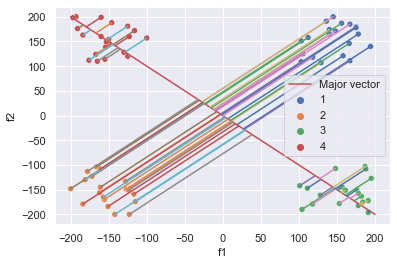

In [125]:
sns.scatterplot(data = df,x = 'f1', y = 'f2',hue = 'label',palette = 'deep')
# Plotting vector line y = -x
xx = [200,-200]
yy = [-200,200]
plt.plot(xx, yy,color = 'r', label = 'Major vector')
for i,[x_val,y_val] in enumerate(x):
    # Plotting the line perpendicular to y = -x
    # and passing through (x_val,y_val)
    xx = (x_val-y_val)/2
    yy = -xx
    plt.plot([x_val,xx],[y_val,yy])

plt.legend()
plt.show()

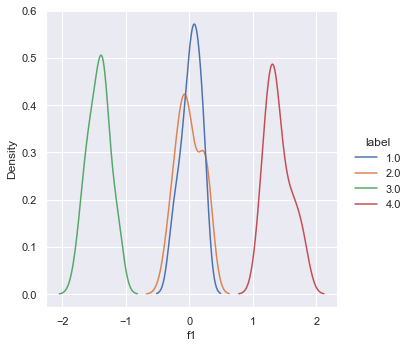

In [126]:
sns.displot(data = df1, x = 'f1', hue = 'label', palette = 'deep', kind = 'kde')

## Earlier when data has 2 dimensions, we can visualize 4 classes with clear decision boundary
## Now 2 classes are merged together, no way to distingush them
## This is due to points of classes 1 and 2 are projected at same places, on the vector passing through classes 3 and 4 has high varience(50.7)
## Both vectors preserve alomost each 50% varience

In [127]:
pca = decomposition.PCA(n_components = 2)
pca_data = pca.fit_transform(x)
pca_data.shape

(80, 2)

In [201]:
# First vector retained 51.5% varience, it passes through classes 3 and 4
# Second  vector retained 48.4% varience, it passes through classes 1 and 2
# These vectors are indeed eigen vectors of cov_matrix
# Corresponding eigen_values tells the amount of explained varience individually
pca.explained_variance_ratio_

array([0.51559896, 0.48440104])

In [130]:
from sklearn.manifold import TSNE

In [198]:
model = TSNE(n_components = 1, random_state = 0, perplexity=30.0, n_iter=350)
tsne_data = model.fit_transform(x)

In [199]:
data = np.hstack([tsne_data,y.reshape(-1,1)])
df = pd.DataFrame(data,columns = ['f1','label'])
df.head()

,f1,label
0,6.731170,1.0
1,2.684803,2.0
2,0.913674,3.0
3,-1.017657,4.0
4,6.548868,1.0


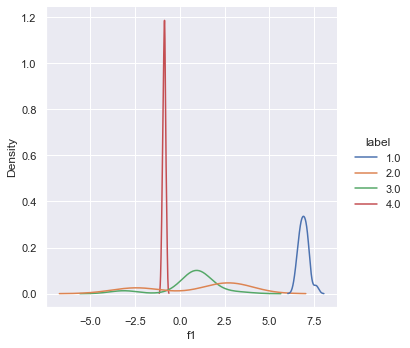

In [200]:
sns.displot(data = df, x = 'f1', hue = 'label', palette = 'deep', kind = 'kde')

## Somewhat better than PCA

In [203]:
# MNIST data
x = train[:2000,:]
y = trainLabels[:2000]

In [204]:
# Reduce to 2 components
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(x)

In [205]:
tsne_data.shape

(2000, 2)

In [206]:
train_new = np.hstack([tsne_data,y.reshape(-1,1)])
df = pd.DataFrame(train_new, columns = ['F1','F2','Label'])
df.head()

,F1,F2,Label
0,-37.929729,-13.202450,5.0
1,-11.400882,-51.350071,0.0
2,29.606407,23.157784,4.0
3,-4.723267,12.077782,1.0
4,27.448597,46.818111,9.0


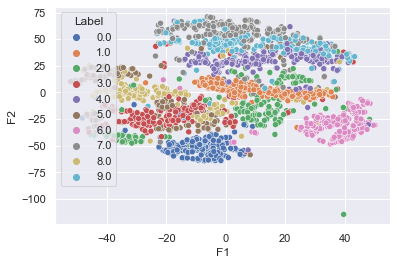

In [207]:
sns.scatterplot(data = df, x = 'F1', y = 'F2', hue = 'Label', palette = 'deep')